# Chapter 6 - Learning Best Practices for Model Evaluation and Hyperparameter Tuning
지금까지 '분류알고리즘'을 학습했다면, 이제는 '모델의 성능을 평가'하는 사례를 공부할 차례다

https://tensorflow.blog/%EB%A8%B8%EC%8B%A0-%EB%9F%AC%EB%8B%9D%EC%9D%98-%EB%AA%A8%EB%8D%B8-%ED%8F%89%EA%B0%80%EC%99%80-%EB%AA%A8%EB%8D%B8-%EC%84%A0%ED%83%9D-%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98-%EC%84%A0%ED%83%9D-1/

In [1]:
# 1 모델 성능에 관한 불편 추정치 계산
# 2 머신러닝 알고리즘의 일반적 문제들 진단
# 3 머신러닝 모델의 미세튜닝
# 4 성능 메트릭을 사용한 예측모델 평가

## 1 scikit-learn 의 PIPE LINE
streaming workflow

### 01 위스콘신 대학교 '유방암'데이터를 활용한 튜닝
https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/

In [2]:
import pandas as pd; import urllib
df = pd.read_csv('./data/wdbc.data', header=None)
print('rows, columns:', df.shape); df[::100]

rows, columns: (569, 32)


,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
100,862717,M,13.61,24.98,88.05,582.7,0.09488,0.08511,0.08625,0.04489,...,16.99,35.27,108.60,906.5,0.1265,0.1943,0.3169,0.1184,0.2651,0.07397
200,877501,B,12.23,19.56,78.54,461.0,0.09586,0.08087,0.04187,0.04107,...,14.44,28.36,92.15,638.4,0.1429,0.2042,0.1377,0.1080,0.2668,0.08174
300,892438,M,19.53,18.90,129.50,1217.0,0.11500,0.16420,0.21970,0.10620,...,25.93,26.24,171.10,2053.0,0.1495,0.4116,0.6121,0.1980,0.2968,0.09929
400,90439701,M,17.91,21.02,124.40,994.0,0.12300,0.25760,0.31890,0.11980,...,20.80,27.78,149.60,1304.0,0.1873,0.5917,0.9034,0.1964,0.3245,0.11980
500,914862,B,15.04,16.74,98.73,689.4,0.09883,0.13640,0.07721,0.06142,...,16.76,20.43,109.70,856.9,0.1135,0.2176,0.1856,0.1018,0.2177,0.08549


In [3]:
# 암세포 진단 (target) : M (malignant(악성)), B (benign(양성))
# 3~32 (parameters)  : 세포핵의 digital image 로부터 계산된 예측모델

X = df.loc[:, 2:].values  # 세포핵 image 예측데이터
y = df.loc[:, 1].values   # M, B 데이터
y[::50]

array(['M', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B'], dtype=object)

In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
le.transform(['M', 'B'])  # String feacture 를 숫자로 변환 { 'M' : 1 , 'B' : 0 }

array([1, 0])

In [5]:
# 정리된 자료를 80% / 20% 로 나눈다
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

### 02 Pipe LIne 내부 변환기에 estimater 결합하기
데이터를 표준화 (standarized)

In [6]:
# 최적의 성능을 위해서는 머신러닝 알고리즘은 '동일한 스케일의 입력 feature' 를 필요로 한다
# 떄문에 데이터를 '표준화'할 필요가 있다
# PCA 주성분 분석으로 '차원축소'를 활용하여, 30개의 feature를 2차원의 부분공간으로 데이터를 압축하자

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [8]:
# 로지스틱 회귀분류기 PipeLine
# Pipeline 에 StandardScaler, PCA, LogisticRegression 등의 오브젝트를 연결
# Pipeline 의 입력은 tuple로써 중간단계 갯수에는 제한이 없다.
pipe_lr = Pipeline([('scl', StandardScaler()),     # 데이터를 평균화 (StandardScaler())
                    ('pca', PCA(n_components=2)),  # 이를 기초로 PCA (주성분분석 2개로 나눔)
                    ('clf', LogisticRegression(random_state=1))])  # estimator (로지스틱회귀분석) 
pipe_lr

Pipeline(steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('clf', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [9]:
pipe_lr.fit(X_train, y_train)  
print('Test Accuracy: %.3f' % pipe_lr.score(X_test, y_test))
y_pred = pipe_lr.predict(X_test)

Test Accuracy: 0.947


Pipe Line의 동작 개념 요약도

<img src="http://karlrosaen.com/ml/learning-log/2016-06-20/pipeline-diagram.png" align='left' width='400'>

## 2 K-fold 교차검증을 통한 모델성능 평가
수용가능한 'bias - 분산' 간의 균형점 예측

over/ under fitting 을 방지하는 균형점 예측 : holdout / k-fold 교차검증

### 01 Hold Out  .method
머신러닝의 '일반화 성능을 추정'하는 전통적 평가모델

모델선택 : 데이터 예측성능을 개선하기 위한 '파라미터설정' 및 '튜닝'의 과정으로, 주어진 분류문제에 대한 퓨팅파라미터의 최적값을 선택

<img src="http://www.cs.nthu.edu.tw/~shwu/courses/ml/labs/08_CV_Ensembling/fig-holdout.png" align='left' width='400'>

In [10]:
# 1 train (훈련용) / test(성능추정용) 로 데이터를 나눈다
# 2 모델선택(성능개선을 위해 parameter 설정을 tuning)을 동일한 데이터를 활용하면 overfit 이 발생
# 3 따라서, train/ test/ valid(검증데이터) 3개로 분할
# 4 성능을 반복 평가하시 valid 데이터를 사용하여 일반화 오차를 추정
# 5 단점 : train/ vaild 를 나눈 방식에 따라 성능에 민감한 영향 >>> k-fold 교차검증시 이를 극복

### 02 k-fold 교차검증
train 데이터를 '보정없이 임의'의 'k'묶음으로 나눈다. (추출시 '비복원 추출')

k1은 train에 활용, 나머지 1개는 test에 활용 

k번 반복되는 동안 k개 모델과 성능의 추정치를 연산가능

<img src="http://blog-test.goldenhelix.com/wp-content/uploads/2015/04/B-fig-1.jpg" align="left">

In [11]:
# 1 hold out 에 비해, '부분분할'에 덜 민감한 추정치를 계산가능
# 2 추정 hyper parametor 를 찾으면, train 전체로 재훈련 및 vaild 로 '최종성능 추정치'를 연산가능
# 3 k-fold 는 보정이 없는 재샘플링 기법으로 결과는 '낮은 분산'을 갖는다 (overfitting 우려)
# 4 k분할 중 1개 묶음은, 전체를 추정하는 일부분으로써 활용

In [12]:
# 1 k 는 10을 일반적 사용, 데이터가 작으면 k를 늘리면 유용하다
# 2 k 값이 작으면 : k-fold를 활용한 변별력이 적음
# 3 k 값이 크면 : 학습시간이 오래걸리고, 개별 추정치의 평균으로 일반화가 곤란 (overfit)
# 4 Leave One Out(LOO) 기법 : k를 n갯수 만큼 나눠서 설정 (k=n) 은 데이터가 매우 작을 떄 활용

In [13]:
# kfold iterator를 (k = 10 분할) 생성
import numpy as np
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=10, random_state=1).split(X_train, y_train)
scores = []

In [14]:
# pipe_lr 파이프라인을 kfold iterator를 사용해 묶음을 반복
for k, (train, test) in enumerate(kfold):
    pipe_lr.fit(X_train[train], y_train[train])  
    score = pipe_lr.score(X_train[test], y_train[test])  # k 묶음의 '정확도'를 연산
    scores.append(score)
    print('k-fold: %s, Class dist.: %s, 정확도(Acc): %.3f' % (k+1, np.bincount(y_train[train]), score))    

k-fold: 1, Class dist.: [256 153], 정확도(Acc): 0.891
k-fold: 2, Class dist.: [256 153], 정확도(Acc): 0.978
k-fold: 3, Class dist.: [256 153], 정확도(Acc): 0.978
k-fold: 4, Class dist.: [256 153], 정확도(Acc): 0.913
k-fold: 5, Class dist.: [256 153], 정확도(Acc): 0.935
k-fold: 6, Class dist.: [257 153], 정확도(Acc): 0.978
k-fold: 7, Class dist.: [257 153], 정확도(Acc): 0.933
k-fold: 8, Class dist.: [257 153], 정확도(Acc): 0.956
k-fold: 9, Class dist.: [257 153], 정확도(Acc): 0.978
k-fold: 10, Class dist.: [257 153], 정확도(Acc): 0.956


In [15]:
# 평균정확도 와 '추정치의 표준편차'를 계산
print('\n평균 정확도(CV accuracy) : %.3f  \n추정치의 표준편차(CV svr) : +/- %.3f' % (np.mean(scores), np.std(scores)))


평균 정확도(CV accuracy) : 0.950  
추정치의 표준편차(CV svr) : +/- 0.029


In [16]:
# pipe_lr의 성능테스트시 복수의 CPU로 분산평가가능
# n_jobs = 1 (하나의 cpu) / 2 (두개로 병렬) / -1 (가능한 모든 CPU 수를 활용) 
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator=pipe_lr, X=X_train, y=y_train, cv=10, n_jobs=-1)
print('CV accuracy scores: %s' % scores)

CV accuracy scores: [ 0.89130435  0.97826087  0.97826087  0.91304348  0.93478261  0.97777778
  0.93333333  0.95555556  0.97777778  0.95555556]


In [17]:
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy: 0.950 +/- 0.029


## 3 '학습곡선'과 '검증곡선'에 의한 알고리즘 디버깅
학습데이터의 overfit(심각한 분산) underfit(심한 bias) 진단을 위한 학습곡선의 활용

### 01 학습곡선에 의한 bias와 분산
데이터가 복잡한 경우(자유도 큰경우) : 지나친 overfit으로 일반화가 어렵다

<img src="https://sebastianraschka.com/images/faq/ml-solvable/bias-variance.png" align="left">

In [18]:
# 왼쪽의 그래프 (높은 bias) - underfit(너무 일반화)
# 문제점 : 예측은 용이하나, 최적화 (훈련정확도, 교차검증 정확도 모두 낮음) 부족
# 해결책 : feature의 수 추가 (SVM, 로지스틱회귀분류), 파라미터를 더 생동감 있게 증가 (정규화 수준의 감소)

In [19]:
# 오른쪽 높은 분산의 그래프 (높은 variance) - overfit(과적합)
# 문제점 : 샘플에 과 최적화 (훈련의 정확도와 교차검증의 정확도 의 차이가 크다)  
# 해결책 : 정규화 파라미터 증가, feature의 선택 / 추출로 데이터를 줄인다
# 한계  : 단, 데이터에 잡음이 많거나, 이미 상당부분 최적화 딘경우에는 도움이 되지 않는다.

In [20]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve  # learning_curve() : train 데이터를 설정

pipe_lr = Pipeline([('scl', StandardScaler()),
                    ('clf', LogisticRegression(penalty='l2', random_state=0))])

In [21]:
# learning_curve() : train 데이터를 설정
# train_sizes = np.linspace(0.1, 1.0, 10) : 시작점과 끝점을 균일 간격으로 나눈다 (10배수 간격을 사용)
# cv = 10 : k-fold 교차검증(Cross Valid)을 사용 
train_sizes, train_scores, test_scores =\
                learning_curve(estimator=pipe_lr,  X=X_train,  y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),  cv=10,  n_jobs=1)

In [22]:
# row 방향으로 평균과 분산을 계산
train_mean = np.mean(train_scores, axis=1)  
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

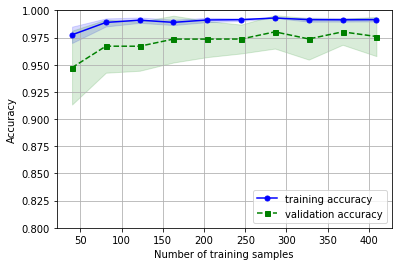

In [23]:
# '훈련 정확도'와 '교차검증 정확'도 곡선의 차이를 시각화
# plt.fill_between (x, y1, y2)     # y1과 y2 의 사이를 공간을 채운다
plt.plot(train_sizes, train_mean,  # training accuracy ploting (train_mean)
         color='blue', marker='o', markersize=5, label='training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,   # validation accuracy ploting (test_mean)
         color='green', linestyle='--',marker='s', markersize=5, label='validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid(); plt.xlabel('Number of training samples'); plt.ylabel('Accuracy')
plt.legend(loc='lower right'); plt.ylim([0.8, 1.0]) ; plt.show()

### 02 검증곡선을 활용한 overfit, underfit 다루기
logistic 회귀의 '역정규화 파라미터'등 다양한 파라미터를 제공

In [24]:
# validation_curve() : k-fold() 교차검증을 활용하여 모델의 성능을 추정
# param_name='clf__C': 역 정규화 파라미터를 활성화를 통해, pipeline 내부의 LogisticRegressin 오브젝트에 접근
from sklearn.model_selection import validation_curve

param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
train_scores, test_scores = validation_curve( X = X_train, y = y_train,
                estimator=pipe_lr, param_name='clf__C', param_range=param_range, cv=10)

In [25]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

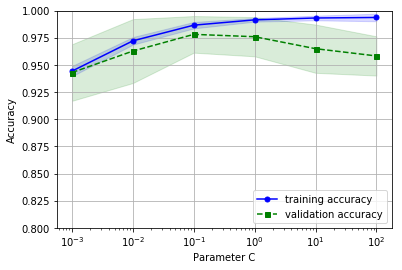

In [26]:
# training accuracy ploting (train_mean)
plt.plot(param_range, train_mean, label='training accuracy',
         color='blue', marker='o', markersize=5)
plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, 
                 alpha=0.15,color='blue')

# validation accuracy ploting (test_mean)
plt.plot(param_range, test_mean, label='validation accuracy',
         color='green', linestyle='--', marker='s', markersize=5)
plt.fill_between(param_range,  test_mean + test_std,  test_mean - test_std, 
                 alpha=0.15, color='green')

plt.grid();  plt.legend(loc='lower right');  plt.xscale('log');  plt.ylim([0.8, 1.0]); 
plt.xlabel('Parameter C');  plt.ylabel('Accuracy');  plt.show()

## 4 그리드 검색을 사용한 머신러닝 모델의 미세튜닝
훈련 데이터 학습된 파라미터, 별도 최적화된 학습 파라미터(튜닝 파라미터) 값들의 최적 결함을 찾음

### 01 그리드 검색을 통한 Hyper Parametor 튜닝
Grid Search 사용자가 설정한 Hyper Parametor 목록을, k-fold 교차검정으로 성능을 평가

In [27]:
# 우선 SVM 의 파이프라인을 훈련
from sklearn.svm import SVC
pipe_svc = Pipeline([('scl', StandardScaler()),
                     ('clf', SVC(random_state=1))])

In [28]:
# param_grid = : 튜닝을 위한 파라미터를 설정 
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]  # 튜닝을 위한 변수값 목록
param_grid = [{'clf__C': param_range, 'clf__kernel': ['linear']},                         # linear svm 설정조합
              {'clf__C': param_range, 'clf__gamma': param_range, 'clf__kernel': ['rbf']}] # rbf svm 설정조합

In [29]:
# GridSearchCV 오브젝트 초기화 및 param_range 의 최적조합을 출력
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(estimator = pipe_svc, param_grid = param_grid, 
                  scoring='accuracy', cv=10, n_jobs=-1)
gs = gs.fit(X_train, y_train)

In [30]:
# .best_score_  : 최고성능의 스코어를 출력
# .best_params_ : 최고성능의 파라미터를 접근 후 출력 
print("Best Score : ", gs.best_score_, "\nBest Param : ", gs.best_params_)

Best Score :  0.978021978022 
Best Param :  {'clf__C': 0.1, 'clf__kernel': 'linear'}


In [31]:
# .best_estimator_ : 최고성능으로 추출된 모델을 테스트 : 독립테스트 시행
clf = gs.best_estimator_
clf.fit(X_train, y_train)
print('Test accuracy: %.3f' % clf.score(X_test, y_test))

Test accuracy: 0.965


In [32]:
# 단 위의 경우는 모든 파라미터의 조합을 평가해서 비용이 비싸다
# 떄문에 RandomizedSearchCV 클래스를 사용하면 파라미터 조합을 임의로 활용해 효과적이다

### 02 중첩 교차검증으로 알고리즘 선택하기
중첩교차검증시 상대적 bias가 없는 결과를 도출가능 (2006, Varma & Simon)

<img src='https://sebastianraschka.com/images/faq/evaluate-a-model/k-fold.png' align='left'>

In [33]:
# 1 '외부 k-fold 교차검증루프'를 통해서 'train 묶음', 'test 묶음'으로 데이터를 나눈다
# 2 '내부loop'는 'train 묶음'에 'k-fold 교차검증'을 통해서 모델을 선택
# 3 'test 묶음'으로 모델의 성능을 평가한다
# 4 총 n개의 외부묶음과, m개의 내부묶음을 통해서 중첩 교차검증을 반복한다

In [34]:
# scikit-learn 을 활용한 중첩 교차검증을 수행한다
# Grid Search 를 설정
gs = GridSearchCV(estimator=pipe_svc,
                  param_grid=param_grid, scoring='accuracy', cv=2)
# GS를 근거로 교차검증을 수행한다
scores = cross_val_score(gs, X_train, y_train, scoring='accuracy', cv=5)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy: 0.965 +/- 0.025


In [35]:
# Note: Optionally, you could use cv=2 
# in the GridSearchCV above to produce
# the 5 x 2 nested CV that is shown in the figure.

In [36]:
# 튜닝결과를 새로운 데이터에 사용시 '평균교차검증 정확도'를 추정가능
# 간단한 의사결정 나무 분류기와 , SVM 교차모델의 성능을 비교
from sklearn.tree import DecisionTreeClassifier

gs = GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
                  param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, None]}],
                  scoring='accuracy',
                  cv=2)
scores = cross_val_score(gs, X_train, y_train, scoring='accuracy', cv=5)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy: 0.921 +/- 0.029


In [37]:
# 결론
# CV accuracy가 Decision Tree 는 92%, SVM cross-vaild 는 96.5%로 더 효과적인 결론이 도출가능 

## 5 여러가지 성능평가 메트릭 살펴보기
CV Accuracy는 정량에눈 유용하나, 정확도(Precision), 리콜(Recall), F1-score 등의 '신뢰성'측정을 위한 다른 평가가 필요

### 01 Confusion Matrix (학습알고리즘 성능을 배치한 행렬)
진짜 레이블과 예측 레이블을 비교하면 matrix 완성이 가능

<img src='https://cdn-images-1.medium.com/max/1600/1*Er092IG0VlWt5cuOh7EQ8g.png' align='left' width='500'>

In [38]:
# scikit-learnd을 활용한 confusion_matrix 구현
# scikit-learn 에서는 '1'을 자동적으로 양성으로 인식하고 연산을 한다!
from sklearn.metrics import confusion_matrix

pipe_svc.fit(X_train, y_train)
y_pred = pipe_svc.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

[[71  1]
 [ 2 40]]


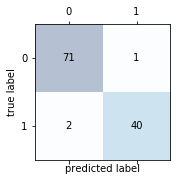

In [39]:
# .matshow() 를 통해서 Matrix를 매핑가능
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3) # heat map
for i in range(confmat.shape[0]):                 # map 위에 연산결과 숫자를 입력한다.
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('predicted label'); plt.ylabel('true label'); plt.show()

In [40]:
# [[양성예측 양성실측,  음성예측 양성실측] , [양성예측 음성실측, 음성예측 음성실측]] 
# 진양성 71개, 진음성 40개로 '샘플을 정확히 예측' : 0.9736842105263158 의 정확도
# 이를 통해 '오차 matrix'이 어떻게 연산 가능한지를 학습한다

### 01-1  matrix 결과를 재정렬
index 0,0의 의미를 위 표와 같이 정렬을 원하는 경우 설정방법

In [41]:
# '양성'(1) '음성'(0) 을 수치로 변환했었다 
le.transform(['M', 'B'])

array([1, 0])

In [42]:
# scikit-learnd을 활용한 confusion_matrix 구현
from sklearn.metrics import confusion_matrix

confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

[[71  1]
 [ 2 40]]


In [43]:
# 0 은 '음성'의 의미로써, index 0, 0은 '음성예측,음성실측'데이터다
# label 이 없는 [ list map ]으로는  자칫 오해를 할 수 있으므로 
# index 1,1의 위치로 재배치를 원한다면, labels argument를 다음과 같이 설정하면  된다.
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred, labels=[1, 0])
print(confmat)

[[40  2]
 [ 1 71]]


### 02 분류 모델의 정밀도와 리콜의 최적화
F1-score (정밀도와 리콜의 조합) : 2 x 정밀도 x 리콜 / 정밀도 + 리콜

<img src="https://image.slidesharecdn.com/qconrio-machinelearningforeveryone-150826200704-lva1-app6892/95/qcon-rio-machine-learning-for-everyone-51-638.jpg" align='left' width='550'>

In [57]:
# 1 정밀도(Precision, PRE)
#  양성판단,임신 / 양성판단,임신 + 양성판단,비임신
#  ex) '양성판단'중 '실제임신'(분모) 비율 (양성판단 대상)

# 2 리콜(recall, REC), 진양성비율, 민감도(Sensitivity)
#  양성판단,임신 / 양성판단,임신 + 비임신판단,임신
#  ex) '실제임신'을 '양성판단'(분모) 비율 (임신자 대상)

In [44]:
# scikit-learn에는 위 공식들이 구현되어 있다
# scikit-learn 에서는 '1'을 자동적으로 양성으로 인식하고 연산을 한다!
from sklearn.metrics import precision_score, recall_score, f1_score

print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred))
print('Recall   : %.3f' % recall_score(y_true=y_test, y_pred=y_pred))
print('F1       : %.3f' % f1_score(y_true=y_test, y_pred=y_pred))

Precision: 0.976
Recall   : 0.952
F1       : 0.964


In [45]:
from sklearn.metrics import make_scorer

scorer = make_scorer(f1_score, pos_label=0)
c_gamma_range = [0.01, 0.1, 1.0, 10.0]
param_grid = [{'clf__C': c_gamma_range, 'clf__kernel': ['linear']},
              {'clf__C': c_gamma_range, 'clf__gamma': c_gamma_range, 'clf__kernel': ['rbf']}]
gs = GridSearchCV(estimator=pipe_svc, param_grid=param_grid,
                  scoring=scorer, cv=10, n_jobs=-1)
gs = gs.fit(X_train, y_train)

print("Best Score : ", gs.best_score_, "\nBest Param : ", gs.best_params_)

Best Score :  0.982798668208 
Best Param :  {'clf__C': 0.1, 'clf__kernel': 'linear'}


## 6 Receiver Operating Characteristic 플로팅
ROC-curve(수신자 판단특성곡선) 는 결정 임계치를 이동함으로써, '가양성비율'과 '진양성비율'를 기반으로 모델을 선택하는 도구

In [46]:
from sklearn.metrics import roc_curve, auc
from scipy import interp

pipe_lr = Pipeline([('scl', StandardScaler()),
                    ('pca', PCA(n_components=2)),
                    ('clf', LogisticRegression(penalty='l2', 
                                               random_state=0, C=100.0))])
X_train2 = X_train[:, [4, 14]]
cv = list(StratifiedKFold(n_splits=3, random_state=1).split(X_train, y_train))

In [47]:
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

In [48]:
fig = plt.figure(figsize=(7, 5))
for i, (train, test) in enumerate(cv):
    probas = pipe_lr.fit(X_train2[train],
                         y_train[train]).predict_proba(X_train2[test])

    fpr, tpr, thresholds = roc_curve(y_train[test],
                                     probas[:, 1], pos_label=1)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i+1, roc_auc))

In [49]:
mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)

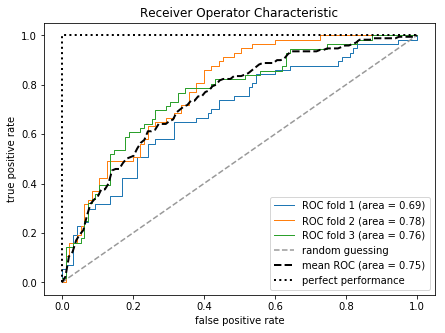

In [50]:
plt.plot([0, 1], [0, 1], linestyle='--',
         color=(0.6, 0.6, 0.6), label='random guessing')

plt.plot(mean_fpr, mean_tpr, 'k--',
         label='mean ROC (area = %0.2f)' % mean_auc, lw=2)

plt.plot([0, 0, 1], [0, 1, 1], lw=2,
         linestyle=':', color='black', label='perfect performance')

plt.xlim([-0.05, 1.05]); plt.ylim([-0.05, 1.05])
plt.xlabel('false positive rate'); plt.ylabel('true positive rate')
plt.title('Receiver Operator Characteristic')
plt.legend(loc="lower right"); plt.show()

In [51]:
# note that we use probabilities for roc_auc
# the `[:, 1]` selects the positive class label only
pipe_lr = pipe_lr.fit(X_train2, y_train)
y_labels = pipe_lr.predict(X_test[:, [4, 14]])
y_probas = pipe_lr.predict_proba(X_test[:, [4, 14]])[:, 1]

In [52]:
# Accuracy : 양성양성, 음성음성 으로 정확하게 판단하는 비율
from sklearn.metrics import roc_auc_score, accuracy_score
print('ROC AUC: %.3f' % roc_auc_score(y_true=y_test, y_score=y_probas))
print('Accuracy: %.3f' % accuracy_score(y_true=y_test, y_pred=y_labels))

ROC AUC: 0.752
Accuracy: 0.711


## 7 다중분류 분석을 위한 Scoring Matrix
k-class 시스템에서 정밀도 스코어의 마이크로 평균을 연산

In [55]:
pre_scorer = make_scorer(score_func=precision_score, 
                         pos_label=1, 
                         greater_is_better=True, 
                         average='micro')
pre_scorer

make_scorer(precision_score, pos_label=1, average=micro)